# Parameter Estimation

In [75]:
from scipy import optimize, integrate
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

data = pd.read_csv('data/C1.csv')
data = data.dropna()
columns = [i for i in data.columns]

x = np.array(data['time (days)'])
liv_algae = data[' algae (10^6 cells/ml)'] * 10**6
liv_rotifer = data[' rotifers (animals/ml)']
dead_rotifer = data[' dead animals (per ml)']
# x = [i for i in zip(x,x)]
y = np.array([i for i in zip(liv_algae, liv_rotifer)], dtype = float)

data1 = pd.DataFrame({'time': x, 'algae (cells(ml)':liv_algae, 'rotifers (cells /ml)':liv_rotifer, 
                     'dead rotifers (cells/ml)': dead_rotifer })


data[' algae (10^6 cells/ml)'] = liv_algae
data['algae/rotifer (per ml)'] = liv_algae / liv_rotifer
data.head()

,time (days),algae (10^6 cells/ml),rotifers (animals/ml),egg-ratio,eggs (per ml),dead animals (per ml),external medium (mu mol N / l),algae/rotifer (per ml)
1,0.95,830000.0,5.42,0.00,0.00,0.4,80.0,153136.531365
2,2.26,700000.0,18.26,0.38,7.02,0.0,80.0,38335.158817
3,2.91,380000.0,17.86,0.19,3.41,0.4,80.0,21276.595745
4,3.95,410000.0,21.07,0.32,6.82,0.4,80.0,19458.946369
5,4.95,390000.0,17.46,0.20,3.41,0.2,80.0,22336.769759


### Deathrate of rotifers

In [67]:
# normalize death ratio:

rot_death_ratio = dead_rotifer/liv_rotifer
rot_death_ratio = np.array(rot_death_ratio)

rot_death_rationorm = np.zeros(len(rot_death_ratio))
for i in range(len(data1)):
    if i == 0:
        norm = 1 / data1.values[i][0]
        rot_death_rationorm[i] =  rot_death_ratio[i] * norm
    else:
        norm = 1 / (data1.values[i][0] - data1.values[i-1][0])
        rot_death_rationorm[i] =  rot_death_ratio[i] * norm
                

normalized mean: 0.1024590008262281 ,, 0.10045351112269069


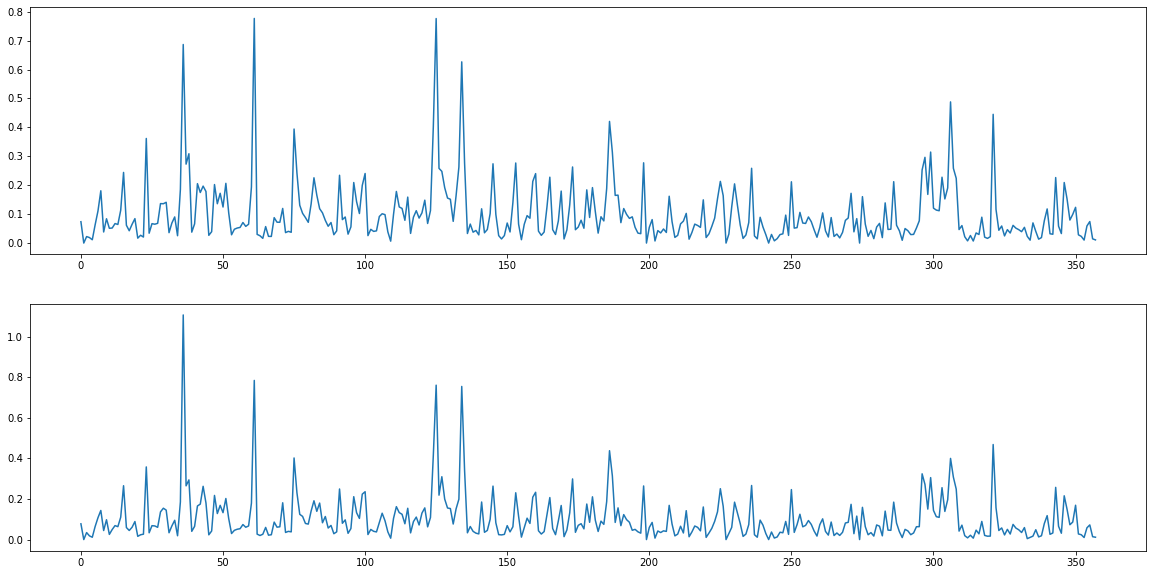

In [56]:
fig, axs = plt.subplots(2, figsize = (20,10))

axs[0].plot(rot_death_ratio)
axs[1].plot(rot_death_rationorm)
print('normalized mean:', np.mean(rot_death_rationorm))

### Consumption rate of algae by rotifers
The average rotifer consumes about 200 algae cells per hour which makes a total of 4800 cells per day. Calculation of estimated consumption rate of algae. In words: the probabilty of each algae to be eaten by a rotifer per normalited time step

In [69]:
algrot_ratio = data['algae/rotifer (per ml)']
algrot_ratio = np.array(algrot_ratio)

for i in range(len(data1)):
    if i == 0:
        norm = 1 / data.values[i][0]
        algrot_ratio[i] = algrot_ratio[i] * norm
    else:
        norm = 1 / (data.values[i][0] - data.values[i-1][0])
        algrot_ratio[i] =  algrot_ratio[i] * norm
        
surv_prob_algae = 4800 / algrot_ratio
print(np.median(surv_prob_algae))

0.25632424489796113


 ### Reproduction rate of rotifer per algae cell

In [72]:
# egg ratio per algae:
eggalg_ratio = np.array(data[' egg-ratio'] / liv_algae)

for i in range(len(data1)):
    if i == 0:
        norm = 1 / data.values[i][0]
        eggalg_ratio[i] = eggalg_ratio[i] * norm
    else:
        norm = 1 / (data.values[i][0] - data.values[i-1][0])
        eggalg_ratio[i] =  eggalg_ratio[i] * norm
        
print(np.median(eggalg_ratio))

5.93635751788735e-07


### Reproduction rate of algae

Rate stays constant bc popaltian grows by different time steps

### Results

In [73]:
print('Algae consumption by rotifer, da:', np.median(surv_prob_algae))
print('Reproduction rate of rotifer per algae cell, gr:', np.median(eggalg_ratio))
print('Rotifer deathrate:', np.median(rot_death_rationorm))

Algae consumption by rotifer, da: 0.25632424489796113
Reproduction rate of rotifer per algae cell, gr: 5.93635751788735e-07
Rotifer deathrate: 0.06716596150533305


Maybe these parameters can also be a fitted function of time, eg poly 2nd degree